In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()
os.chdir(r'C:\Users\bishw\Dropbox\IVY DATA SCIENCE\Python\Resources\03LOGISTIC_REGRESSION\Case2')

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.drop(labels=['User ID'], axis=1, inplace=True)

In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.Purchased=df.Purchased.astype('category')
df.Gender=df.Gender.astype('category')

In [8]:
df.groupby(by="Gender")["Gender"].count()
#no of female greater than male in this dataset

Gender
Female    204
Male      196
Name: Gender, dtype: int64

In [9]:
df.groupby(by="Purchased")["Purchased"].count()
#Class imbalance noted majority class is 0 and minority is 1

Purchased
0    257
1    143
Name: Purchased, dtype: int64

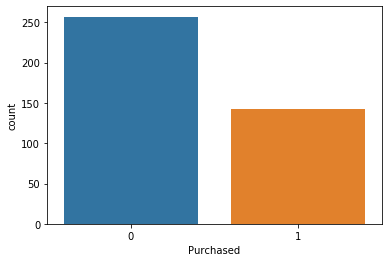

In [10]:
sns.countplot(df.Purchased)

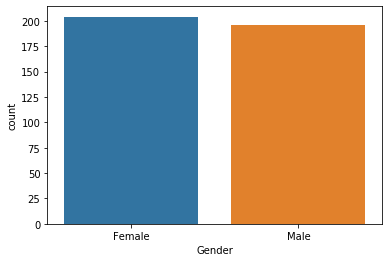

In [11]:
sns.countplot(df.Gender)

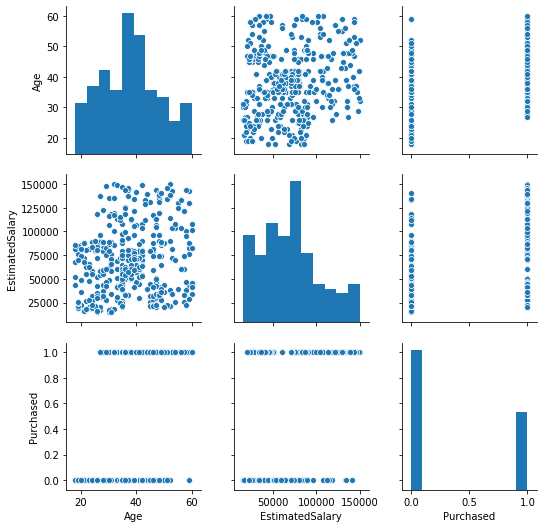

In [12]:
sns.pairplot(df)

In [13]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Perfoming Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
lr=LogisticRegression()

In [16]:
skl=StandardScaler()

In [17]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [18]:
dum=pd.get_dummies(df.Gender, drop_first=True)

In [19]:
df=pd.concat([df,dum], axis=1)

In [20]:
df.drop(labels="Gender", axis=1, inplace=True)

In [21]:
X=df.loc[:,['Age',"EstimatedSalary","Male"]]
y=df.loc[:,"Purchased"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1429, stratify=y)

In [23]:
X_train_skl=skl.fit_transform(X_train)
X_test_skl=skl.fit_transform(X_test)

In [24]:
lr.fit(X_train_skl, y_train)

C:\Users\bishw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred=lr.predict(X_test_skl)

In [26]:
from sklearn import metrics

In [27]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        77
           1       0.77      0.84      0.80        43

    accuracy                           0.85       120
   macro avg       0.84      0.85      0.84       120
weighted avg       0.85      0.85      0.85       120



In [28]:
Accuracy=metrics.accuracy_score(y_test, pred)
print("Accuracy of the model is:\n",Accuracy)

Accuracy of the model is:
 0.85


In [29]:
AUC=metrics.roc_auc_score(y_test, pred)
print ("Area under ROC is :", np.round(AUC,2))

Area under ROC is : 0.85


Plotting ROC and AUC

In [30]:
fpr, tpr, th = metrics.roc_curve(y_test,lr.predict_proba(X_test_skl)[:,1])

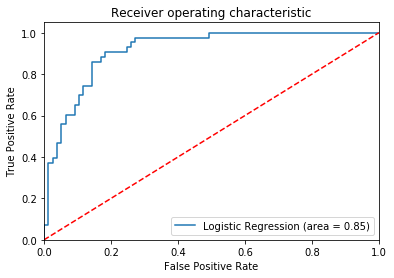

In [31]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %AUC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [32]:
cm=metrics.confusion_matrix(y_test, pred)
cm

array([[66, 11],
       [ 7, 36]], dtype=int64)

Text(33.0, 0.5, 'Actual Class')

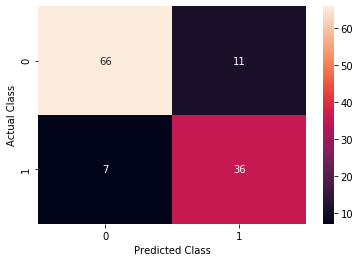

In [33]:
ax=sns.heatmap(cm,annot=True)
ax.set_ylim(2,0)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

Performing Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf=RandomForestClassifier()

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
hyper={"max_depth":[2.3,4],"max_features":['auto','sqrt','log2',None], 
       "criterion":['gini','entropy'], 
       "bootstrap":[True,False] }
gdcv=GridSearchCV(estimator=rf,param_grid=hyper, cv=10, n_jobs=3 )

In [46]:
bestF = gdcv.fit(X_train_skl, y_train)

C:\Users\bishw\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
print('Best Parameters using grid search: \n', 
      bestF.best_estimator_)

Best Parameters using grid search: 
 RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Calcualtion of number of tree for min OOB

In [48]:
from sklearn.model_selection import validation_curve

In [49]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train_skl, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range =[100, 300, 500, 750, 800, 1200], cv = 3)

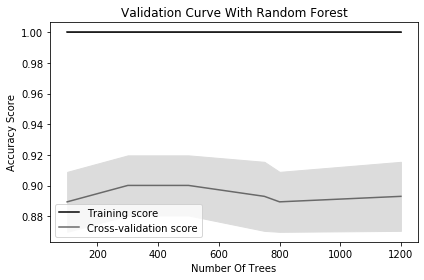

In [50]:
param_range =[100, 300, 500, 750, 800, 1200]
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [51]:
rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2.3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
rf.fit(X_train_skl, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2.3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
pred1=rf.predict(X_test_skl)

In [54]:
print(metrics.classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        77
           1       0.89      0.95      0.92        43

    accuracy                           0.94       120
   macro avg       0.93      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [55]:
Accuracy=metrics.accuracy_score(y_test, pred1)
print("Accuracy:",np.round(Accuracy,2))

Accuracy: 0.94


In [56]:
AUC=metrics.roc_auc_score(y_test, pred)
print("Area under curve", np.round(AUC,2))

Area under curve 0.85


In [57]:
fpr, tpr, th = metrics.roc_curve(y_test,rf.predict_proba(X_test_skl)[:,1])

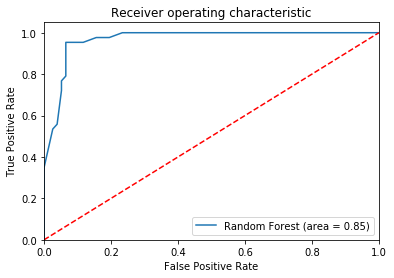

In [58]:
#plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' %AUC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

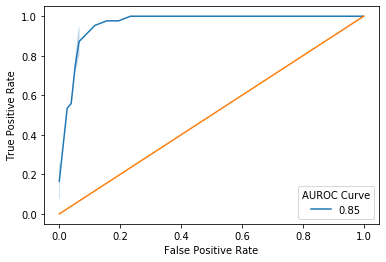

In [59]:
sns.lineplot(fpr,tpr, )
sns.lineplot(x=(0,1), y=(0,1))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(title='AUROC Curve', loc='lower right', labels=[np.round(AUC,2)])

In [60]:
imp_features=pd.Series(rf.feature_importances_, index=X_train.columns). sort_values(ascending=False)

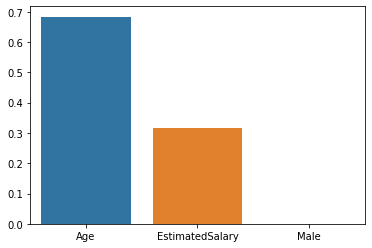

In [61]:
sns.barplot(y=imp_features, x=X_train.columns)

In [62]:
import pandas as pd
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import export_graphviz


C:\Users\bishw\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [63]:
dot_data = StringIO()

In [64]:
export_graphviz(rf.estimators_[5], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

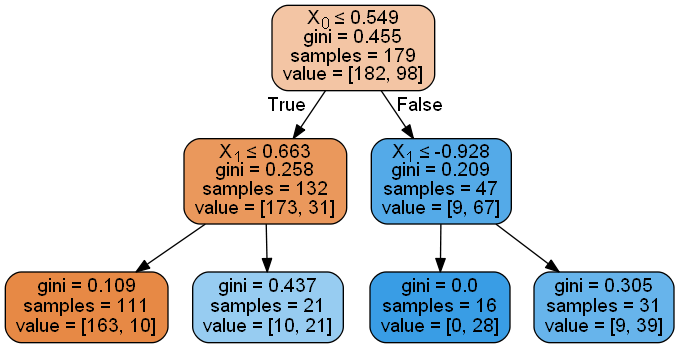

In [65]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())